# Exercises

## Exercise 1: Reading and Exploring Raster Data
Open the single-band DEM image using rasterio.

Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.

Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

In [3]:
single_band_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

multi_band_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}
BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)


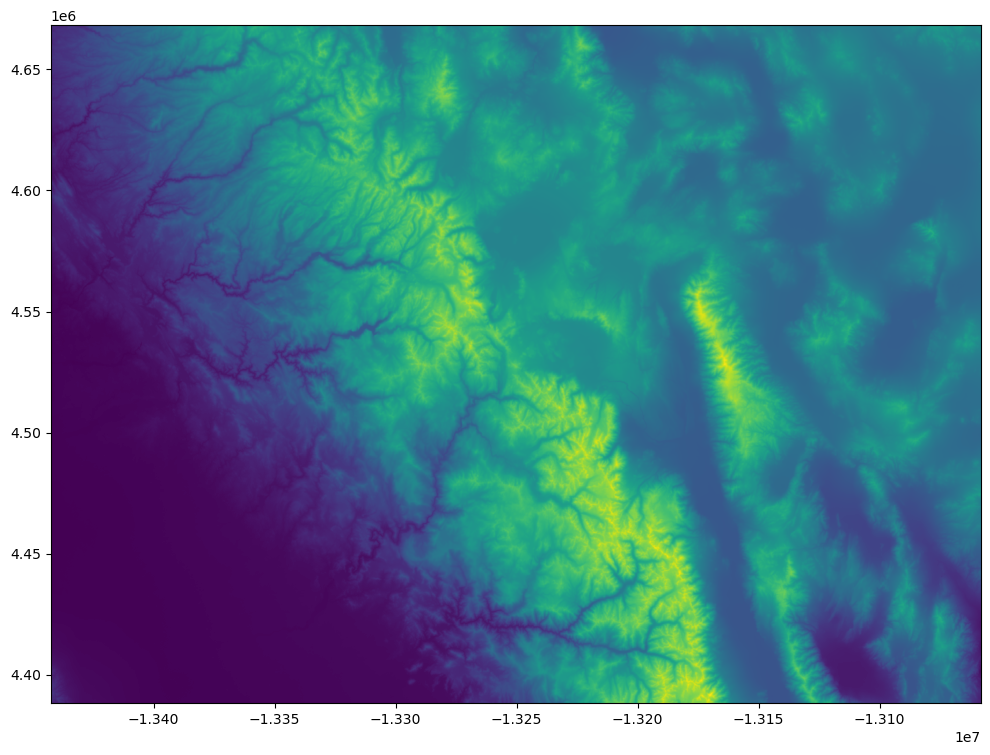

In [9]:
import rasterio
import matplotlib.pyplot as plt
import rasterio.plot
import numpy as np

src = rasterio.open(single_band_path, "r")
print(src.meta)
print(src.bounds)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
rasterio.plot.show(src, ax=ax)
plt.show()

## Exercise 2: Visualizing and Manipulating Raster Bands
Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).

Open the multispectral image and visualize the first band using a suitable colormap.

Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

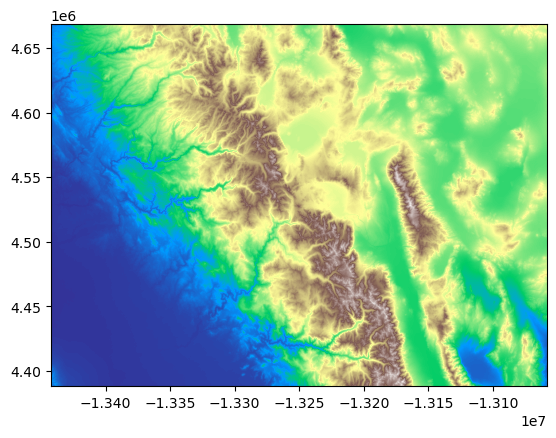

<Axes: >

In [10]:
rasterio.plot.show(src, cmap="terrain")

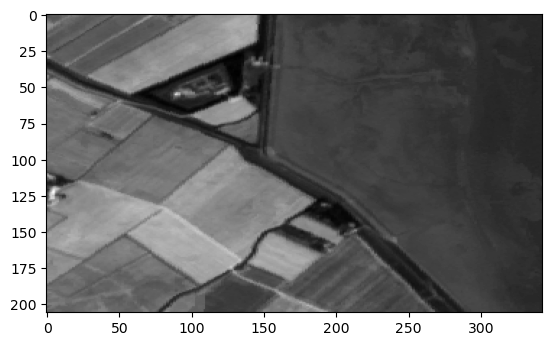

<Axes: >

In [109]:
multi_src = rasterio.open(multi_band_path)
ultra_blue = multi_src.read(1)

rasterio.plot.show(ultra_blue, cmap="gray")

In [110]:
multi_src.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 343,
 'height': 206,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
        0.0, -8.983152841195215e-05, 53.41634207654228)}

In [111]:
multi_src.colorinterp

(<ColorInterp.gray: 1>,
 <ColorInterp.undefined: 0>,
 <ColorInterp.undefined: 0>,
 <ColorInterp.undefined: 0>)

In [118]:
red_band = multi_src.read(4).astype(np.int32)
green_band = multi_src.read(3).astype(np.int32)
blue_band = multi_src.read(2).astype(np.int32)


In [119]:
blue_band

array([[1204, 1174, 1171, ...,  947,  945,  945],
       [1189, 1190, 1179, ...,  956,  956,  956],
       [1193, 1177, 1176, ...,  947,  946,  945],
       ...,
       [1221, 1208, 1204, ...,  995,  977,  980],
       [1184, 1170, 1161, ...,  992,  987,  985],
       [1161, 1156, 1136, ...,  990,  999,  995]])

In [129]:

rgb = np.dstack((red_band, green_band, blue_band))
rgb = (rgb / rgb.max()) * 255
rgb = rgb.astype(np.uint8)
#rgb = rgb.clip(0,1)


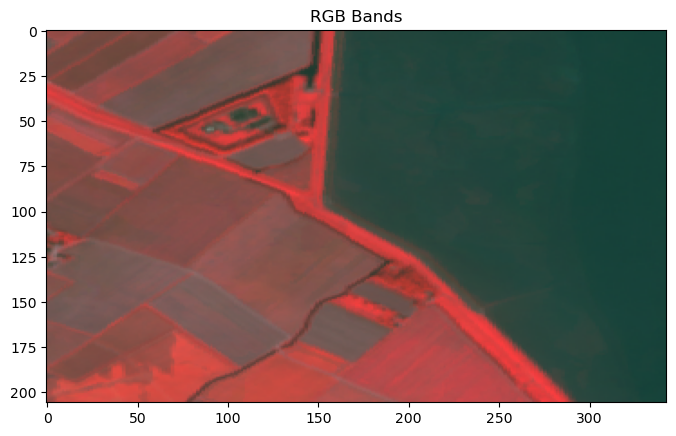

In [131]:

plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("RGB Bands")
plt.show()

## Exercise 3: Raster Clipping with Array Indexing
Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).

Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.

Save the clipped raster subset to a new file named clipped_multispectral.tif.

In [134]:
data = multi_src.read()

In [135]:
data.shape

(4, 206, 343)

In [136]:

subset = data[:,50:150, 100:200]

In [138]:
subset.shape

(4, 100, 100)

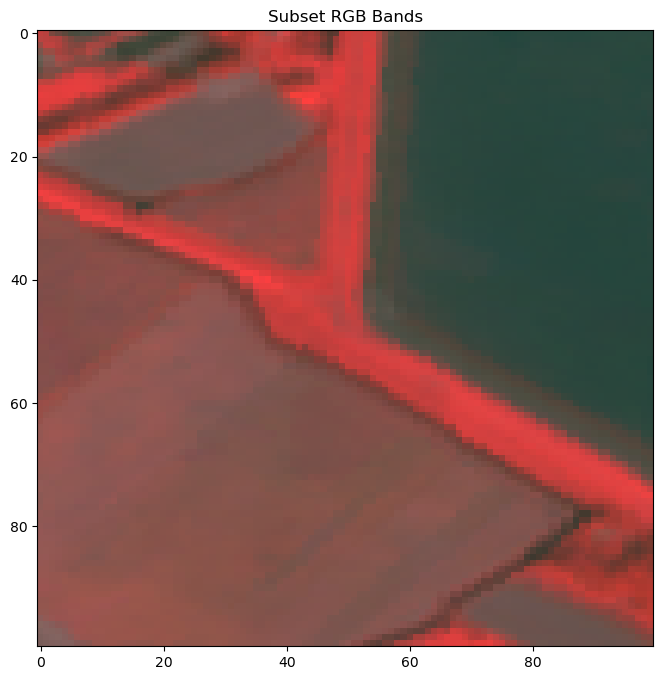

In [139]:
rgb_subset = np.dstack((subset[3], subset[2], subset[1]))
rgb_subset = (rgb_subset / rgb_subset.max()) * 255
rgb_subset = rgb_subset.astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.imshow(rgb_subset)
plt.title("Subset RGB Bands")
plt.show()

In [140]:
from rasterio.windows import Window
from rasterio.transform import from_bounds

window = Window(100, 50, 100, 100)
window_bounds = rasterio.windows.bounds(window, multi_src.transform)
new_transform = from_bounds(*window_bounds, window.width, window.height)

In [141]:
with rasterio.open("landsat_clip.tif", "w", driver="GTiff", width=window.width, height=window.height, count=4, dtype=subset.dtype, crs=multi_src.crs, transform=new_transform, compress="lzw") as dst:
    dst.write(subset)

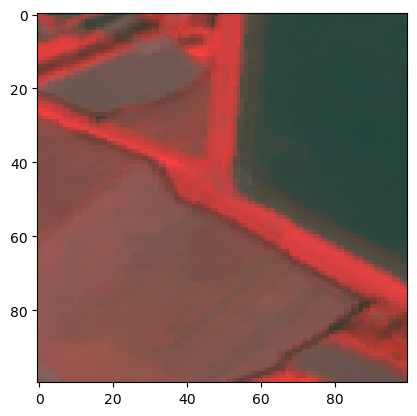

In [143]:
with rasterio.open("landsat_clip.tif") as clipped_src:
    clipped_data = clipped_src.read()
    rgb_subset = np.dstack((clipped_data[3], clipped_data[2], clipped_data[1]))
    rgb_subset = (rgb_subset / rgb_subset.max()) * 255
    rgb_subset = rgb_subset.astype(np.uint8)
    plt.imshow(rgb_subset)

## Exercise 4: Calculating NDWI(Band Math)
Open the multispectral image and extract the Green and Near-Infrared (NIR) bands.

Compute the Normalized Difference Water Index (NDWI) using the formula:

NDWI= (Green - NIR) / (Green + NIR)

Visualize the NDWI result using a water-friendly colormap (e.g., cmap=’Blues’) to highlight water bodies.

Save the resulting NDWI image as a new raster file named ndwi.tif.

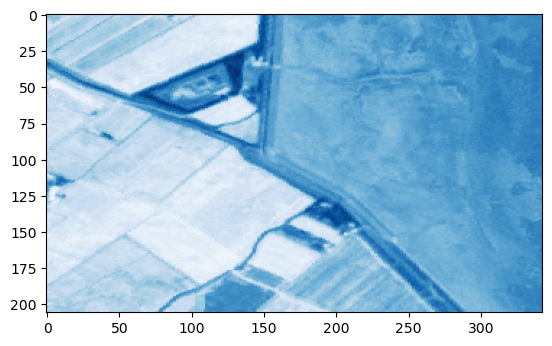

In [144]:
multi_src = rasterio.open(multi_band_path)
nir_band = multi_src.read(1)
green_band = multi_src.read(3)

ndwi = (green_band - nir_band) / (green_band + nir_band)

plt.imshow(ndwi, cmap="Blues")

In [148]:
ndwi

array([[0.09043704, 0.10270034, 0.10026155, ..., 0.20043455, 0.19859307,
        0.19859307],
       [0.09786646, 0.10767883, 0.11201511, ..., 0.19023066, 0.19350558,
        0.19682018],
       [0.07446361, 0.10588235, 0.10579649, ..., 0.19575279, 0.20109339,
        0.19521479],
       ...,
       [0.09165303, 0.04086444, 0.04113924, ..., 0.18462343, 0.1966327 ,
        0.19407721],
       [0.05145369, 0.05860731, 0.06602591, ..., 0.19108781, 0.19492868,
        0.1938883 ],
       [0.07496252, 0.07352152, 0.07140563, ..., 0.19424837, 0.19113622,
        0.18996037]])

In [145]:
profile = multi_src.profile

In [146]:
profile

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}

In [149]:
profile.update(dtype=rasterio.float32, count=1, compress="lzw")
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 343, 'height': 206, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [150]:
output_path = "ndwi.tif"
with rasterio.open(output_path, "w", **profile) as dst:
  dst.write(ndwi, 1)
print(f"Raster data has been written to {output_path}")

Raster data has been written to ndwi.tif


## Exercise 5: Reprojecting Raster Data
Reproject the single-band DEM raster from its original CRS to EPSG:4326 (WGS 84) using the rasterio.warp.reproject function.

Save the reprojected raster to a new GeoTIFF file named reprojected_dem.tif.

Visualize both the original and reprojected DEM datasets to compare how the reprojection affects the spatial coverage and resolution.

In [161]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
dst_crs = "EPSG:4326"
output_path = "reprojected_dem.tif"

with rasterio.open(single_band_path) as src:
  transform, width,height = calculate_default_transform(
    src.crs, dst_crs, src.width, src.height, *src.bounds
  )

  profile = src.profile
  profile.update(
    crs=dst_crs,
    transform=transform,
    width=width,
    height=height
  )

  with rasterio.open(output_path, "w", **profile) as dst:
    for i in range(1, src.count + 1):
      reproject(
        source=rasterio.band(src, i),
        destination=rasterio.band(dst, i),
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest
      )
print(f"Raster data has been written to {output_path}")

Raster data has been written to reprojected_dem.tif


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4575, 'height': 2642, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0007543273324700005, 0.0, -120.75592734935736,
       0.0, -0.0007543273324700005, 38.62692343418839)}


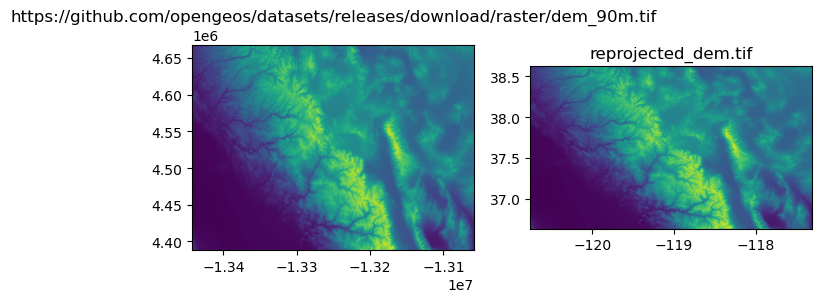

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
axes = ax.flatten()

for i, path in enumerate([single_band_path, output_path]):
  with rasterio.open(path) as src:
    axes[i].set_title(path)
    rasterio.plot.show(src, ax=axes[i])
    print(src.meta)